## Theoretical Questions

### 1. What is a Support Vector Machine (SVM)?
A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
It finds the optimal hyperplane that separates data points of different classes with the maximum margin, maximizing the distance
to the nearest data points (support vectors) from either side.

### 2. What is the difference between Hard Margin and Soft Margin SVM?
Hard Margin SVM assumes the data is perfectly linearly separable and enforces strict separation without errors, using a maximum margin hyperplane.
Soft Margin SVM allows for some misclassifications by introducing slack variables, balancing margin maximization with error tolerance via a regularization parameter C.
It is more practical for noisy or non-separable data.

### 3. What is the mathematical intuition behind SVM?
SVM aims to maximize the margin (distance) between the decision boundary (hyperplane) and the closest points.
Mathematically, for a hyperplane w·x + b = 0, the margin is 2/||w||. Optimization minimizes ||w||/2 subject to y_i(w·x_i + b) >= 1 for all i,
ensuring correct classification with the widest possible margin.

### 4. What is the role of Lagrange Multipliers in SVM?
Lagrange Multipliers (α_i) are used in the dual formulation of the SVM optimization problem to handle the inequality constraints.
They transform the primal quadratic programming problem into a dual one, making it easier to solve, especially with kernels,
and reveal that only support vectors (α_i > 0) contribute to the decision boundary.

### 5. What are Support Vectors in SVM?
Support Vectors are the data points closest to the decision hyperplane that define the margin boundaries.
They are the critical points with non-zero Lagrange multipliers (α_i > 0) that influence the position and orientation of the hyperplane.
The model depends only on these vectors, making SVM memory-efficient.

### 6. What is a Support Vector Classifier (SVC)?
SVC is the classification variant of SVM that uses support vectors to define a decision boundary for separating classes.
It supports linear and non-linear kernels and is implemented in scikit-learn as sklearn.svm.SVC.

### 7. What is a Support Vector Regressor (SVR)?
SVR extends SVM to regression by finding a hyperplane that fits the data within a margin of tolerance (epsilon),
minimizing errors outside this tube while controlling model complexity. It uses the same kernel tricks as SVC.

### 8. What is the Kernel Trick in SVM?
The Kernel Trick allows SVM to handle non-linear data by implicitly mapping inputs to a higher-dimensional space via kernel functions
(e.g., RBF, Polynomial), computing dot products without explicitly computing high-dimensional features, avoiding the curse of dimensionality.

### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- Linear Kernel: K(x, y) = x·y; suitable for linearly separable, high-dimensional data (e.g., text); fast and simple.
- Polynomial Kernel: K(x, y) = (x·y + c)^d; captures non-linear interactions up to degree d; interpretable but prone to overfitting if d is high.
- RBF (Radial Basis Function) Kernel: K(x, y) = exp(-γ||x-y||^2); highly flexible for complex boundaries; default choice but sensitive to γ (overfitting if too large).

### 10. What is the effect of the C parameter in SVM?
C is the regularization parameter controlling the trade-off between maximizing the margin and minimizing classification errors.
Low C prioritizes a wider margin (underfitting, tolerant to errors); high C prioritizes correct classification (overfitting, narrow margin).

### 11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma defines the influence of a single training example; low γ leads to smoother, broader decision boundaries (underfitting);
high γ causes overfitting with tight boundaries around each point. It scales the RBF function's width.

### 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on Bayes' Theorem that assumes feature independence (naïve assumption)
to compute posterior probabilities P(class|features) = P(features|class) * P(class) / P(features).
It's "naïve" due to this strong independence assumption, which simplifies computation but may not hold in reality.

### 13. What is Bayes’ Theorem?
Bayes’ Theorem states P(A|B) = [P(B|A) * P(A)] / P(B), where P(A|B) is the posterior, P(B|A) is likelihood, P(A) is prior, and P(B) is evidence.
In classification, A is the class, B is the features.

### 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
- Gaussian NB: Assumes continuous features follow a Gaussian distribution; uses mean/variance for likelihood.
- Multinomial NB: For discrete count data (e.g., word frequencies in text); models multinomial distributions.
- Bernoulli NB: For binary/boolean features (e.g., presence/absence of words); uses Bernoulli (0/1) distributions.

### 15. When should you use Gaussian Naïve Bayes over other variants?
Use Gaussian NB for continuous numerical features (e.g., sensor data, measurements) where Gaussian assumption fits,
like in medical diagnostics or finance, over discrete variants.

### 16. What are the key assumptions made by Naïve Bayes?
- Features are conditionally independent given the class (naïve assumption).
- Features follow a specific distribution (e.g., Gaussian for continuous).
- Class priors are known or estimated from data.

### 17. What are the advantages and disadvantages of Naïve Bayes?
Advantages: Fast training/prediction, handles high dimensions, robust to irrelevant features, works well with small data.
Disadvantages: Strong independence assumption often violated, poor with correlated features, zero-frequency problem without smoothing.

### 18. Why is Naïve Bayes a good choice for text classification?
Text features (e.g., word counts) are high-dimensional and sparse; NB handles this efficiently with multinomial/Bernoulli variants,
is fast for large corpora, and the independence assumption approximates well for bag-of-words models.

### 19. Compare SVM and Naïve Bayes for classification tasks.
SVM: Effective for high-dimensional data, robust to outliers, handles non-linearity via kernels; slower training, needs scaling.
Naïve Bayes: Probabilistic, fast, good for text/sparse data; assumes independence, less accurate if violated.
SVM better for complex margins; NB for quick baselines.

### 20. How does Laplace Smoothing help in Naïve Bayes?
Laplace (add-one) smoothing adds 1 to all counts in probability estimates, preventing zero probabilities for unseen features
and avoiding division by zero, improving generalization on unseen data.

## Practical Questions

### 21. Train SVM Classifier on Iris dataset and evaluate accuracy

In [6]:
def q21():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Q21: SVM on Iris - Accuracy: {acc:.4f}")
q21()

Q21: SVM on Iris - Accuracy: 1.0000


### 22. Train SVM with Linear and RBF on Wine, compare accuracies

In [7]:
def q22():
    wine = datasets.load_wine()
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
    clf_linear = SVC(kernel='linear', random_state=42)
    clf_rbf = SVC(kernel='rbf', random_state=42)
    clf_linear.fit(X_train, y_train)
    clf_rbf.fit(X_train, y_train)
    pred_linear = clf_linear.predict(X_test)
    pred_rbf = clf_rbf.predict(X_test)
    acc_linear = accuracy_score(y_test, pred_linear)
    acc_rbf = accuracy_score(y_test, pred_rbf)
    print(f"Q22: Linear Acc: {acc_linear:.4f}, RBF Acc: {acc_rbf:.4f}")
q22()

Q22: Linear Acc: 1.0000, RBF Acc: 0.8056


### 23. Train SVR on housing dataset, evaluate MSE

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model (RBF kernel)
svr = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


### 24. Train SVM with Polynomial Kernel, visualize decision boundary (2D projection)

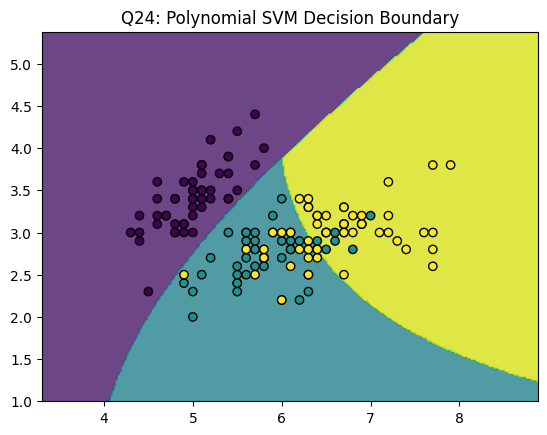

Q24: Accuracy: 0.8333


In [9]:
def q24():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # Use first 2 features for viz
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC(kernel='poly', degree=3, random_state=42)
    clf.fit(X_train, y_train)

    # Mesh for decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("Q24: Polynomial SVM Decision Boundary")
    plt.show()
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Q24: Accuracy: {acc:.4f}")
q24()

### 25. Gaussian NB on Breast Cancer, evaluate accuracy

In [10]:
def q25():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Q25: Gaussian NB Accuracy: {acc:.4f}")
q25()

Q25: Gaussian NB Accuracy: 0.9737


### 26. Multinomial NB on 20 Newsgroups

In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Select a few categories (optional)
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

# Load training and test data
train_data = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

test_data = fetch_20newsgroups(
    subset='test',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

# Build the pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english', max_df=0.7)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1.0))
])

# Train the model
text_clf.fit(train_data.data, train_data.target)

# Make predictions
pred = text_clf.predict(test_data.data)

# Evaluate
print("Accuracy:", accuracy_score(test_data.target, pred))
print("\nClassification Report:\n")
print(classification_report(test_data.target, pred, target_names=test_data.target_names))


Accuracy: 0.7420546932742055

Classification Report:

                    precision    recall  f1-score   support

       alt.atheism       0.60      0.71      0.65       319
     comp.graphics       0.88      0.92      0.90       389
         sci.space       0.73      0.92      0.81       394
talk.religion.misc       0.78      0.23      0.36       251

          accuracy                           0.74      1353
         macro avg       0.75      0.69      0.68      1353
      weighted avg       0.75      0.74      0.71      1353



### 27. SVM with different C values, compare decision boundaries (2D Iris)

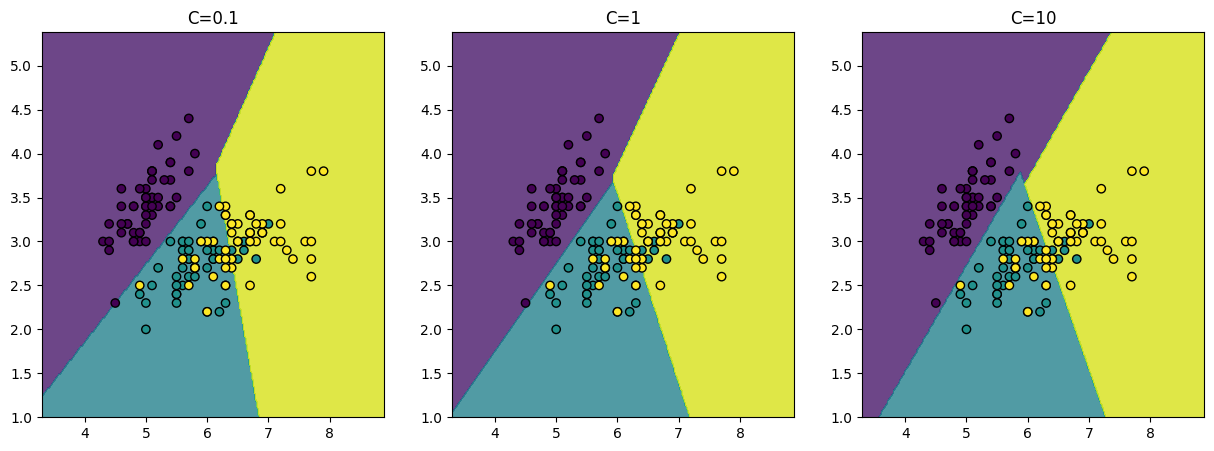

Q27: Decision boundaries visualized for different C values.


In [15]:
def q27():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    C_values = [0.1, 1, 10]
    fig, axs = plt.subplots(1, len(C_values), figsize=(15, 5))
    for i, C in enumerate(C_values):
        clf = SVC(kernel='linear', C=C, random_state=42)
        clf.fit(X_train, y_train)
        h = .02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axs[i].contourf(xx, yy, Z, alpha=0.8)
        axs[i].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        axs[i].set_title(f"C={C}")
    plt.show()
    print("Q27: Decision boundaries visualized for different C values.")
q27()

### 28. Bernoulli NB on binary features (synthetic binary dataset)

In [16]:
def q28():
    # Synthetic binary data
    np.random.seed(42)
    X = np.random.randint(0, 2, size=(100, 5))
    y = np.sum(X, axis=1) % 2  # Binary label based on parity
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Q28: Bernoulli NB Accuracy: {acc:.4f}")
q28()

Q28: Bernoulli NB Accuracy: 0.4500


### 29. Feature scaling before SVM, compare with unscaled

In [17]:
def q29():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    # Unscaled
    clf_unscaled = SVC(kernel='linear', random_state=42)
    clf_unscaled.fit(X_train, y_train)
    acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))
    # Scaled
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf_scaled = SVC(kernel='linear', random_state=42)
    clf_scaled.fit(X_train_scaled, y_train)
    acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))
    print(f"Q29: Unscaled Acc: {acc_unscaled:.4f}, Scaled Acc: {acc_scaled:.4f}")
q29()

Q29: Unscaled Acc: 1.0000, Scaled Acc: 0.9667


### 30. Gaussian NB with/without Laplace Smoothing (alpha=1 for smoothing)

In [18]:
def q30():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    # Without smoothing (var_smoothing=1e-9 default small)
    gnb_no = GaussianNB(var_smoothing=1e-9)
    gnb_no.fit(X_train, y_train)
    pred_no = gnb_no.predict(X_test)
    # With smoothing (higher var_smoothing simulates Laplace-like)
    gnb_yes = GaussianNB(var_smoothing=1e-2)
    gnb_yes.fit(X_train, y_train)
    pred_yes = gnb_yes.predict(X_test)
    print(f"Q30: No Smoothing Acc: {accuracy_score(y_test, pred_no):.4f}, With Smoothing Acc: {accuracy_score(y_test, pred_yes):.4f}")
q30()

Q30: No Smoothing Acc: 0.9737, With Smoothing Acc: 0.9474


### 31. SVM with GridSearchCV for C, gamma, kernel

In [19]:
def q31():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}
    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print(f"Q31: Best Params: {grid.best_params_}, Best CV Score: {grid.best_score_:.4f}")
    acc = accuracy_score(y_test, grid.predict(X_test))
    print(f"Test Acc: {acc:.4f}")
q31()

Q31: Best Params: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, Best CV Score: 0.9583
Test Acc: 1.0000


### 32. SVM on imbalanced dataset (synthetic), with class weighting

In [20]:
def q32():
    # Imbalanced: 90% class 0, 10% class 1
    np.random.seed(42)
    X = np.random.randn(1000, 2)
    y = np.concatenate([np.zeros(900), np.ones(100)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Without weighting
    clf_no = SVC(kernel='linear', random_state=42)
    clf_no.fit(X_train, y_train)
    acc_no = accuracy_score(y_test, clf_no.predict(X_test))
    # With weighting
    clf_yes = SVC(kernel='linear', class_weight='balanced', random_state=42)
    clf_yes.fit(X_train, y_train)
    acc_yes = accuracy_score(y_test, clf_yes.predict(X_test))
    print(f"Q32: No Weight Acc: {acc_no:.4f}, With Weight Acc: {acc_yes:.4f}")
q32()

Q32: No Weight Acc: 0.9000, With Weight Acc: 0.5250


### 33. Naïve Bayes for spam detection (synthetic email data)

In [21]:
def q33():
    # Synthetic email data: features as word counts (simple)
    emails = [
        "buy cheap viagra now", "win lottery free money",  # Spam
        "meeting tomorrow office", "hello how are you",  # Ham
        "click here for discount", "family vacation photos"  # Mixed
    ]
    y = [1, 1, 0, 0, 1, 0]  # 1=spam, 0=ham
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(emails)
    # Train/test split (small, so full train, predict new)
    nb = MultinomialNB()
    nb.fit(X, y)
    new_email = vectorizer.transform(["free offer click here"])
    pred = nb.predict(new_email)[0]
    print(f"Q33: Prediction for 'free offer click here': {'Spam' if pred == 1 else 'Ham'}")
q33()

Q33: Prediction for 'free offer click here': Spam


### 34. SVM and NB on same dataset (Iris), compare accuracy

In [22]:
def q34():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    # SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train, y_train)
    acc_svm = accuracy_score(y_test, svm.predict(X_test))
    # NB
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    acc_nb = accuracy_score(y_test, nb.predict(X_test))
    print(f"Q34: SVM Acc: {acc_svm:.4f}, NB Acc: {acc_nb:.4f}")
q34()

Q34: SVM Acc: 1.0000, NB Acc: 1.0000


### 35. Feature selection before NB, compare results (Iris)

In [23]:
def q35():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    # Without selection
    nb_no = GaussianNB()
    nb_no.fit(X_train, y_train)
    acc_no = accuracy_score(y_test, nb_no.predict(X_test))
    # With selection (SelectKBest)
    selector = SelectKBest(chi2, k=2)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)
    nb_yes = GaussianNB()
    nb_yes.fit(X_train_sel, y_train)
    acc_yes = accuracy_score(y_test, nb_yes.predict(X_test_sel))
    print(f"Q35: No Selection Acc: {acc_no:.4f}, With Selection Acc: {acc_yes:.4f}")
q35()

Q35: No Selection Acc: 1.0000, With Selection Acc: 1.0000


### 36. SVM with OvR and OvO on Wine, compare accuracy

In [24]:
def q36():
    wine = datasets.load_wine()
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
    # OvR
    ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
    ovr.fit(X_train, y_train)
    acc_ovr = accuracy_score(y_test, ovr.predict(X_test))
    # OvO
    ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
    ovo.fit(X_train, y_train)
    acc_ovo = accuracy_score(y_test, ovo.predict(X_test))
    print(f"Q36: OvR Acc: {acc_ovr:.4f}, OvO Acc: {acc_ovo:.4f}")
q36()

Q36: OvR Acc: 1.0000, OvO Acc: 1.0000


### 37. SVM with Linear, Poly, RBF on Breast Cancer, compare accuracy

In [25]:
def q37():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    kernels = ['linear', 'poly', 'rbf']
    accuracies = {}
    for k in kernels:
        clf = SVC(kernel=k, random_state=42)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        accuracies[k] = acc
    print(f"Q37: Accuracies - Linear: {accuracies['linear']:.4f}, Poly: {accuracies['poly']:.4f}, RBF: {accuracies['rbf']:.4f}")
q37()

Q37: Accuracies - Linear: 0.9561, Poly: 0.9474, RBF: 0.9474


### 38. SVM with Stratified K-Fold CV, average accuracy

In [26]:
def q38():
    iris = datasets.load_iris()
    clf = SVC(kernel='linear', random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, iris.data, iris.target, cv=skf)
    avg_acc = scores.mean()
    print(f"Q38: Average Stratified CV Accuracy: {avg_acc:.4f}")
q38()

Q38: Average Stratified CV Accuracy: 0.9867


### 39. NB with different priors (simulate by adjusting class priors)

In [27]:
def q39():
    # Synthetic data
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Default priors
    gnb_def = GaussianNB(priors=None)
    gnb_def.fit(X_train, y_train)
    acc_def = accuracy_score(y_test, gnb_def.predict(X_test))
    # Biased priors [0.8, 0.2]
    gnb_bias = GaussianNB(priors=[0.8, 0.2])
    gnb_bias.fit(X_train, y_train)
    acc_bias = accuracy_score(y_test, gnb_bias.predict(X_test))
    print(f"Q39: Default Priors Acc: {acc_def:.4f}, Biased Priors Acc: {acc_bias:.4f}")
q39()

Q39: Default Priors Acc: 0.3500, Biased Priors Acc: 0.6500


### 40. RFE before SVM, compare accuracy (Iris)

In [28]:
def q40():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    # Without RFE
    clf_no = SVC(kernel='linear', random_state=42)
    clf_no.fit(X_train, y_train)
    acc_no = accuracy_score(y_test, clf_no.predict(X_test))
    # With RFE (select 2 features)
    rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    clf_yes = SVC(kernel='linear', random_state=42)
    clf_yes.fit(X_train_rfe, y_train)
    acc_yes = accuracy_score(y_test, clf_yes.predict(X_test_rfe))
    print(f"Q40: No RFE Acc: {acc_no:.4f}, With RFE Acc: {acc_yes:.4f}")
q40()

Q40: No RFE Acc: 1.0000, With RFE Acc: 1.0000


### 41. SVM evaluate with Precision, Recall, F1 (Breast Cancer)

In [29]:
def q41():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Q41: Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
q41()

Q41: Precision: 0.9459, Recall: 0.9859, F1: 0.9655


### 42. NB evaluate with Log Loss (Iris, binary subset for simplicity)

In [30]:
def q42():
    iris = datasets.load_iris()
    # Binary: setosa vs non-setosa
    y_binary = (iris.target == 0).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(iris.data, y_binary, test_size=0.2, random_state=42)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_proba = nb.predict_proba(X_test)
    ll = log_loss(y_test, y_proba)
    print(f"Q42: Log Loss: {ll:.4f}")
q42()

Q42: Log Loss: 0.0000


### 43. SVM Confusion Matrix with seaborn (Iris)

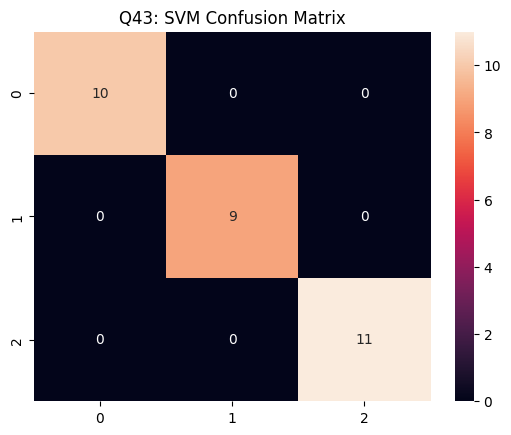

In [31]:
def q43():
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title("Q43: SVM Confusion Matrix")
    plt.show()
q43()

### 44. SVR evaluate with MAE (housing)

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate using MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.37623305741746177


### 45. NB ROC-AUC (Breast Cancer, binary)

In [33]:
def q45():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_proba = nb.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"Q45: ROC-AUC: {auc:.4f}")
q45()

Q45: ROC-AUC: 0.9984


### 46. SVM Precision-Recall Curve (Breast Cancer)

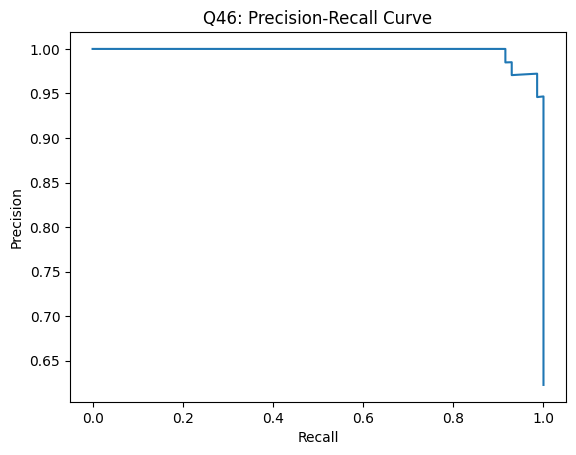

In [34]:
def q46():
    cancer = datasets.load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
    clf = SVC(kernel='linear', probability=True, random_state=42)
    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec)
    plt.title("Q46: Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
q46()